### Performance Evaluation, Cross Validation and Hyper - Parameter Tunning

- Evaluation metrics
- Cross Validation
- Hyperparameter Tuning

diabetes dataset for classification. Given different medical specifications about a person, we have to predict if the person have diabetes or not.

- Number of times pregnant: num_preg
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test: plasma_glucose_conc
- Diastolic blood pressure (mm Hg): D_blood_pressure
- Triceps skin fold thickness (mm): skin_fold_thickness
- 2-Hour serum insulin (mu U/ml): serum_insulin
- Body mass index (weight in kg/(height in m)^2): body_mass_index
- Diabetes pedigree function: pedigree_func
- Age (years): age
- Class variable (0 or 1): diabetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# since the column names are numerical, we will give our own column names for our understanding
col = ["num_preg", "plasma_glucose_conc", "D_blood_pressure", "skin_fold_thickness", "serum_insulin", "body_mass_index", "pedigree_func", "age", "diabetes"]
diabetes_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/diabetes.txt", names = col)

In [3]:
diabetes_data.head()

,num_preg,plasma_glucose_conc,D_blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_func,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This dataset contains 13 columns and based on different features, it is guessed whether or not a person has Diabetes

### Separating Input variables and output variable

In [4]:
X = diabetes_data.drop('diabetes', axis = 1)
y = diabetes_data.diabetes

**Split into training and testing (80:20)**

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# The below line of code will not need to separate input variables and output variables.
# The code is very simple if you remember numpy and pandas session. Indexing dataframe and arrays
# x_train, x_test, y_train, y_test = train_test_split(diabetes.iloc[:, :-1], diabetes.iloc[:,-1], test_size=0.2, random_state=3)

MLPClassifier from neural_network module of sklearn library. MLP Classifier is also a classification algorithm like logistic regression or decision tree. 

### Developing a model

In [6]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

**Performance Evaluation**
-  evaluation metrics
- accuracy score is not a good evaluation metric

some particular dataset like fraud detection have imbalance problem. Let's consider the same dataset, suppose we have 1000 transaction in the dataset. Out of 1000 transactions 20 transactions are fraud transactions. Now let's say you build a model which predicted all the 1000 transactions as not fraud transaction, for 980 transaction which were not fraud, the prediction is correct while the transaction which were actually fraud are also predicted as not fraud. The accuracy is nothing but total correct prediction divided by total prediction. In this case we have total prediction as 1000 (as we have 1000 transactions) while total correct prediction is 980, resulting the accuracy score of 980/1000 = 0.98. The model is giving 98% of accuracy. Do you think the model is good? No, because our model could not notice the transaction which were actually fraud.

### 1. Evaluation Metrics

All performance metrics in sklearn are to be written in the same way -

metric_function(true_label, predicted_labels)

### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[58, 34],
       [24, 38]], dtype=int64)

In [8]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 38
True Negative 58
False Positive 34
False Negative 24


### Accuracy


In [9]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.6233766233766234

**When is it good to use accuracy score as a model evaluation metric?**
1. The classifications in the dataset is nearly symmetrical (means equal distribution of all the classes).
1. The false positive and false negative on test data are nearly equal.

### Recall (Sensitivity)

In [10]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6129032258064516

### Specificity

sklearn does not have an inbuild function for Specificity. But by adding parameter pos_label =0 to the recall function, we treat that as the positive class, and hence gives the correct output

In [11]:
print("Specificity with recall pos label=0: ",
         recall_score(y_test, y_pred, pos_label=0))

Specificity with recall pos label=0:  0.6304347826086957


**Checking with formulas (tn , fp from confusion matrix):**

In [12]:
print("Specificity with Formulas: ", tn/(tn+fp))

Specificity with Formulas:  0.6304347826086957


### Precision

In [13]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.5277777777777778

In [14]:
tp / (tp + fp)

0.5277777777777778

### Imbalanced Datasets

In [15]:
diabetes_data.iloc[:,-1].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [16]:
diabetes_data['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

### Matthews Correlation Coefficient

In [17]:
from sklearn.metrics import matthews_corrcoef
print("MCC Score: ",matthews_corrcoef(y_test, y_pred))

MCC Score:  0.23918092068237007


### F1 Score

the harmonic mean of Precision and recall

In [18]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.5671641791044777


### Area Under the Curve (Reciever Operating Characterstics)

roc

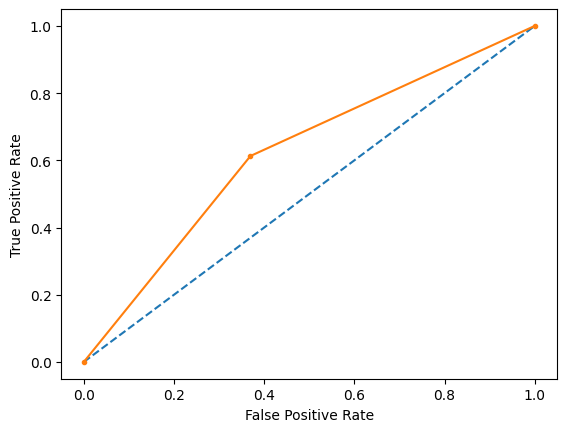

In [19]:
# plot roc curve 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) # fpr = false positive rate, tpr = true positive rate
plt.plot([0,1], [0,1], linestyle='--') # plot the no skill line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, marker='.') # plot the roc curve for the model
plt.show()

In [23]:
# plot the ROC curve for the model
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

# calculate roc curve and plot the roc curve for the model

AUC: 0.62
